Proyek Pertama : Membuat Model NLP dengan TensorFlow

NAMA : ELA DIRANDA PAHIRA

EMAIL : eladiranda@gmail

DOMISILI : KALIANDA, LAMPUNG SELATAN


In [1]:
#Install Kaggle Package
!pip install -q kaggle

In [2]:
#Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riturajdutta","key":"f51cb1396a1eaa532cef82ba012f8118"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-31 06:29:52           9984  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6126  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2279  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2531  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [5]:
#Download File Dataset
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 72.0MB/s]


In [6]:
!mkdir netflix-shows
!unzip netflix-shows.zip -d netflix-shows
!ls netflix-shows

Archive:  netflix-shows.zip
  inflating: netflix-shows/netflix_titles.csv  
netflix_titles.csv


In [7]:
#Import Pandas
import pandas as pd

In [8]:
# load dataset
df = pd.read_csv('netflix-shows/netflix_titles.csv')
df.head(10)

show_id  ...                                        description
0      s1  ...  In a future where the elite inhabit an island ...
1      s2  ...  After a devastating earthquake hits Mexico Cit...
2      s3  ...  When an army recruit is found dead, his fellow...
3      s4  ...  In a postapocalyptic world, rag-doll robots hi...
4      s5  ...  A brilliant group of students become card-coun...
5      s6  ...  A genetics professor experiments with a treatm...
6      s7  ...  After an awful accident, a couple admitted to ...
7      s8  ...  After one of his high school students attacks ...
8      s9  ...  When a doctor goes missing, his psychiatrist w...
9     s10  ...  An architect and his wife move into a castle t...

[10 rows x 12 columns]

In [9]:
#Kolom Data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
#Total Data
df.shape

(7787, 12)

In [11]:
#Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
#Type
df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [35]:
#Menghapus Kolom
df_new = df.drop(columns=['show_id', 'title', 'cast', 'country', 'release_year', 'date_added', 'rating', 'duration', 'listed_in'], axis = 1)
df_new

type  ...                                        description
0     TV Show  ...  In a future where the elite inhabit an island ...
1       Movie  ...  After a devastating earthquake hits Mexico Cit...
2       Movie  ...  When an army recruit is found dead, his fellow...
3       Movie  ...  In a postapocalyptic world, rag-doll robots hi...
4       Movie  ...  A brilliant group of students become card-coun...
...       ...  ...                                                ...
7782    Movie  ...  When Lebanon's Civil War deprives Zozo of his ...
7783    Movie  ...  A scrappy but poor boy worms his way into a ty...
7784    Movie  ...  In this documentary, South African rapper Nast...
7785  TV Show  ...  Dessert wizard Adriano Zumbo looks for the nex...
7786    Movie  ...  This documentary delves into the mystique behi...

[7787 rows x 3 columns]

In [36]:
#Cleansing Data
import nltk, os, re, string
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
!pip install matplotlib-venn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# removing functuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.director = df_new.director.apply(lambda x: cleaner(x))
    df_new.description = df_new.description.apply(lambda x: lem(x))
## lematization
lemmatizer = WordNetLemmatizer()
def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.director = df_new.director.apply(lambda x: lem(x))
    df_new.description = df_new.description.apply(lambda x: lem(x))
# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['director'].apply(rem_numbers)
    df_new['description'].apply(rem_numbers)
# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.director = df_new.director.apply(lambda x: stopword(x))
    df_new.description = df_new.description.apply(lambda x: lem(x))

In [38]:
#Data Setelah cleansing
df_new.head(10)

type  ...                                        description
0  TV Show  ...  In a future where the elite inhabit an island ...
1    Movie  ...  After a devastating earthquake hits Mexico Cit...
2    Movie  ...  When an army recruit is found dead, his fellow...
3    Movie  ...  In a postapocalyptic world, rag-doll robots hi...
4    Movie  ...  A brilliant group of students become card-coun...
5  TV Show  ...  A genetics professor experiments with a treatm...
6    Movie  ...  After an awful accident, a couple admitted to ...
7    Movie  ...  After one of his high school students attacks ...
8    Movie  ...  When a doctor goes missing, his psychiatrist w...
9    Movie  ...  An architect and his wife move into a castle t...

[10 rows x 3 columns]

In [39]:
#Data Type one-hot-encoding
type = pd.get_dummies(df_new.type)
df_new_cat = pd.concat([df_new, type], axis=1)
df_new_cat = df_new_cat.drop(columns='type')
df_new_cat.head(10)

director  ... TV Show
0                NaN  ...       1
1  Jorge Michel Grau  ...       0
2       Gilbert Chan  ...       0
3        Shane Acker  ...       0
4     Robert Luketic  ...       0
5        Serdar Akar  ...       1
6    Yasir Al Yasiri  ...       0
7     Kevin Reynolds  ...       0
8      Shravan Kumar  ...       0
9       Vikram Bhatt  ...       0

[10 rows x 4 columns]

In [40]:
#Change dataframe value to numpy array
news = df_new_cat['director'].astype(str).values + '' + df_new_cat['description'].values 
label = df_new_cat[['Movie', 'TV Show']].values

In [41]:
#View News Array
news

array(['nanIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'Jorge Michel GrauAfter a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "Gilbert ChanWhen an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "nanIn this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'nanDessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'Sam DunnThis documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      

In [42]:
#View Label Array
label

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [43]:
#Membagi Data ke Training dan Validation
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2, shuffle=True)

In [45]:
#Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [69]:
#Model Sequential
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 258       
Total params: 435,586
Trainable params: 435,586
Non-trainable params: 0
_________________________________________________________________


In [72]:
#Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.851 and logs.get('val_accuracy')>0.851):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 85.1%!")
callbacks = myCallback()

In [73]:
#Model Fit
# model fit
history = model.fit(padded_train, label_train, epochs=50, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
195/195 - 9s - loss: 3.6300e-04 - accuracy: 0.9998 - val_loss: 1.3042 - val_accuracy: 0.8575

The accuracy of the training set and the validation set has reached > 85.1%!


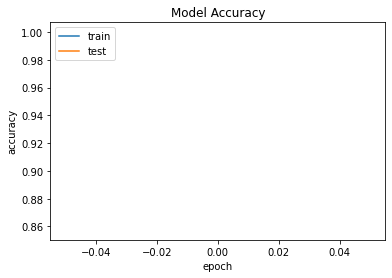

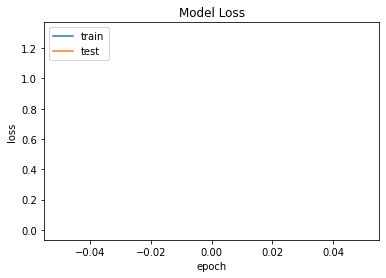

In [76]:
#Plot of Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()